In [1]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


### Data preparation

In [2]:
X, y = make_regression(n_samples=100, n_features=1, bias=10.0, noise=10.0, random_state=2)
y = np.expand_dims(y, axis=1)

print(X.shape)
print(y.shape)

(100, 1)
(100, 1)


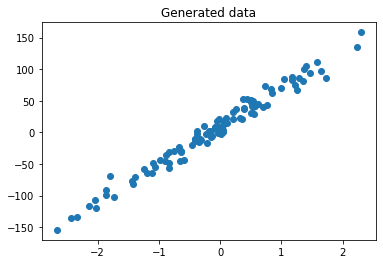

In [3]:
plt.scatter(X, y)
plt.title('Generated data')
plt.show()

### Data split

In [4]:
train_x = X[:80]
test_x = X[80:]

train_y = y[:80]
test_y = y[80:]

In [5]:
train_x.shape

(80, 1)

In [6]:
test_x.shape

(20, 1)

### Defining model

In [7]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, activation='linear', input_shape=(1,)))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [9]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])

### Training

In [10]:
model.fit(train_x, train_y, batch_size=10, epochs=100, shuffle=True)

Epoch 1/100
8/8 [==============================] - 0s 1ms/step - loss: 3497.1440 - mse: 3497.1440
Epoch 2/100
8/8 [==============================] - 0s 726us/step - loss: 2208.3104 - mse: 2208.3104
Epoch 3/100
8/8 [==============================] - 0s 848us/step - loss: 1631.3887 - mse: 1631.3888
Epoch 4/100
8/8 [==============================] - 0s 835us/step - loss: 1305.4532 - mse: 1305.4532
Epoch 5/100
8/8 [==============================] - 0s 925us/step - loss: 1159.1032 - mse: 1159.1032
Epoch 6/100
8/8 [==============================] - 0s 1ms/step - loss: 772.3134 - mse: 772.3134
Epoch 7/100
8/8 [==============================] - 0s 962us/step - loss: 542.3866 - mse: 542.3866
Epoch 8/100
8/8 [==============================] - 0s 803us/step - loss: 388.1440 - mse: 388.1440
Epoch 9/100
8/8 [==============================] - 0s 1ms/step - loss: 303.7302 - mse: 303.7302
Epoch 10/100
8/8 [==============================] - 0s 786us/step - loss: 257.9148 - mse: 257.9148
Epoch 11/100
8/

8/8 [==============================] - 0s 1ms/step - loss: 82.1202 - mse: 82.1202
Epoch 86/100
8/8 [==============================] - 0s 1ms/step - loss: 109.8277 - mse: 109.8277
Epoch 87/100
8/8 [==============================] - 0s 850us/step - loss: 60.9327 - mse: 60.9327
Epoch 88/100
8/8 [==============================] - 0s 970us/step - loss: 67.9057 - mse: 67.9057
Epoch 89/100
8/8 [==============================] - 0s 850us/step - loss: 71.8824 - mse: 71.8824
Epoch 90/100
8/8 [==============================] - 0s 811us/step - loss: 70.2574 - mse: 70.2574
Epoch 91/100
8/8 [==============================] - 0s 768us/step - loss: 114.2967 - mse: 114.2967
Epoch 92/100
8/8 [==============================] - 0s 923us/step - loss: 79.2052 - mse: 79.2052
Epoch 93/100
8/8 [==============================] - 0s 937us/step - loss: 58.2898 - mse: 58.2898
Epoch 94/100
8/8 [==============================] - 0s 1ms/step - loss: 84.8436 - mse: 84.8436
Epoch 95/100
8/8 [===========================

### Test

In [11]:
y_pred = model.predict(test_x)

Text(0.5, 1.0, 'Model test')

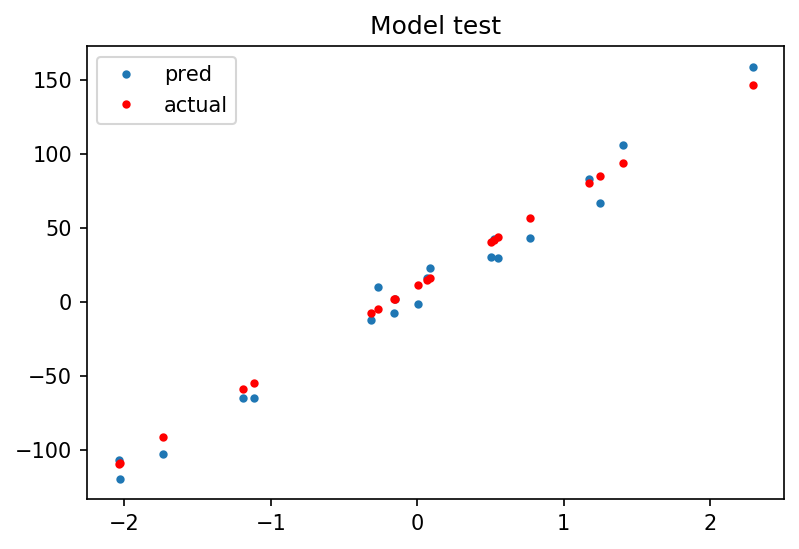

In [21]:
plt.figure(dpi=150)
plt.plot(test_x, test_y,'.')
plt.plot(test_x, y_pred,'r.')
plt.legend(['pred', 'actual'])
plt.title('Model test')

### Weight / bias (advanced)

In [13]:
model.layers[0].get_weights()

[array([[59.012638]], dtype=float32), array([10.906623], dtype=float32)]

In [14]:
w1 = model.layers[0].get_weights()[0]
b1 = model.layers[0].get_weights()[1]

In [15]:
w1 = w1[0]
b1 = b1[0]

In [16]:
y_pred2 = test_x * w1 + b1

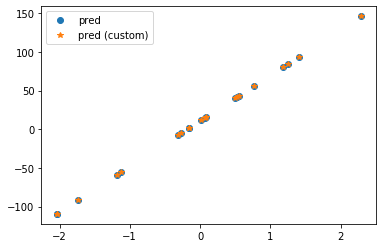

In [17]:
plt.plot(test_x, y_pred,'o')
plt.plot(test_x, y_pred2,'*')
plt.legend(['pred', 'pred (custom)'])

Text(0.5, 1.0, 'linear regression using keras')

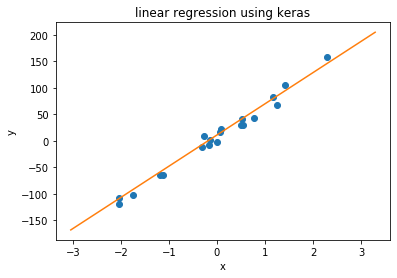

In [20]:
x1 = np.min(test_x)-1, np.max(test_x)+1
y1 = w1 * x1 + b1
#plt.figure(dpi=150)
plt.plot(test_x, test_y,'o')
plt.plot(x1, y1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('linear regression using keras')

# References

Simple Linear Regression with Tensorflow 2.0, https://ayoteralab.tistory.com/entry/Tensorflow-20-05-Simple-Linear-Regression-3 or https://archive.is/ya44R